**Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

**Loading Dataset**

In [ ]:
df = pd.read_csv("/content/kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [ ]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

1) Bathrooms, floors are of float type which is wrong, they should be of int type

2) date should be of data type

In [ ]:
df['date'] = pd.to_datetime(df['date'])
df['bathrooms']=df.bathrooms.astype(int)
df['floors']=df.floors.astype(int)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1,1180,5650,1,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2,2570,7242,2,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1,770,10000,1,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3,1960,5000,1,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2,1680,8080,1,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [ ]:
df.duplicated().any().sum()

0

There is no null or duplicated values in the dataset

The price of a house is certainly influenced by its age. Therefore, I plan to introduce a new "house age" column, which will be computed as the difference between the year of the date and the year it was built.

Renovations will also impact the price, so I will create a "renovated" column. If the renovation year is not null or zero, the value in the "renovated" column will be set to 1; otherwise, it will be set to 0. This will help us better understand the effect of renovations on house prices.

Additionally, as part of data cleanup, I will remove unnecessary columns like "date," "year built,", "id" and "year renovated."







In [ ]:
df["house_age"] = df["date"].dt.year - df['yr_built']
df["reinovated"]=df['yr_renovated'].apply(lambda yr: 0 if yr == 0 else 1)
df = df.drop(['date', 'yr_renovated', 'yr_built','id'], axis=1)

In [ ]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,house_age,reinovated
0,221900.0,3,1,1180,5650,1,0,0,3,7,1180,0,98178,47.5112,-122.257,1340,5650,59,0
1,538000.0,3,2,2570,7242,2,0,0,3,7,2170,400,98125,47.7210,-122.319,1690,7639,63,1
2,180000.0,2,1,770,10000,1,0,0,3,6,770,0,98028,47.7379,-122.233,2720,8062,82,0
3,604000.0,4,3,1960,5000,1,0,0,5,7,1050,910,98136,47.5208,-122.393,1360,5000,49,0
4,510000.0,3,2,1680,8080,1,0,0,3,8,1680,0,98074,47.6168,-122.045,1800,7503,28,0


In [ ]:
df['waterfront'].unique()

array([0, 1])

In [ ]:
df['view'].unique()

array([0, 3, 4, 2, 1])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  int64  
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  int64  
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21613 non-null  int64  
 11  sqft_basement  21613 non-null  int64  
 12  zipcode        21613 non-null  int64  
 13  lat            21613 non-null  float64
 14  long           21613 non-null  float64
 15  sqft_living15  21613 non-null  int64  
 16  sqft_lot15     21613 non-null  int64  
 17  house_age      21613 non-null  int64  
 18  reinov

In [ ]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,house_age,reinovated
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,1.749734,2079.899736,1.510697e+04,1.446213,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,98077.939805,47.560053,-122.213896,1986.552492,12768.455652,43.317818,0.042289
std,3.671272e+05,0.930062,0.734873,918.440897,4.142051e+04,0.551894,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,53.505026,0.138564,0.140828,685.391304,27304.179631,29.375493,0.201253
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,-1.000000,0.000000
25%,3.219500e+05,3.000000,1.000000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000,18.000000,0.000000
50%,4.500000e+05,3.000000,2.000000,1910.000000,7.618000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000,40.000000,0.000000
75%,6.450000e+05,4.000000,2.000000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,63.000000,0.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.000000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,115.000000,1.000000


In [ ]:
df.shape

(21613, 19)

**Data Visualization**

In [ ]:
features = df.iloc[:, 1:].columns

Scatter Plot

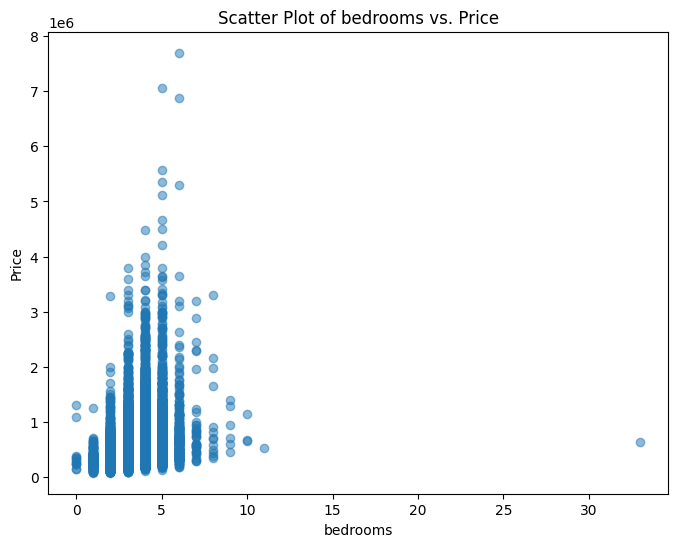

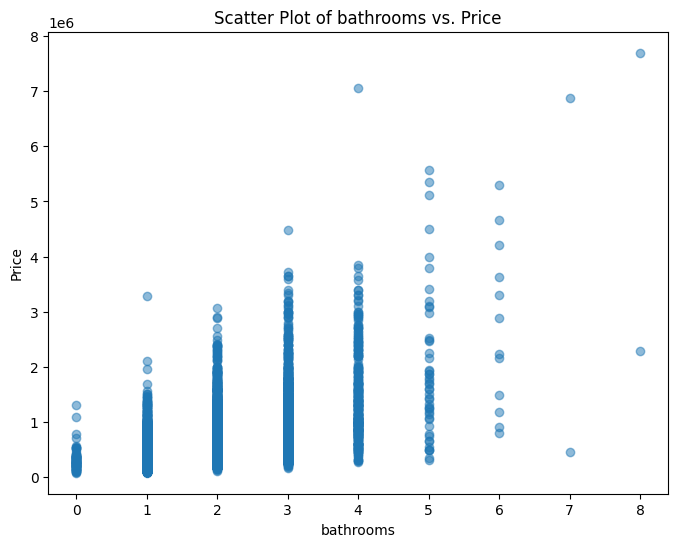

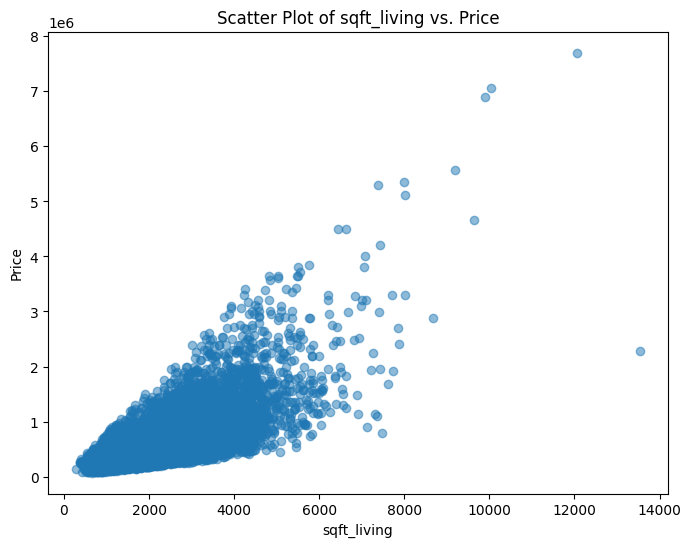

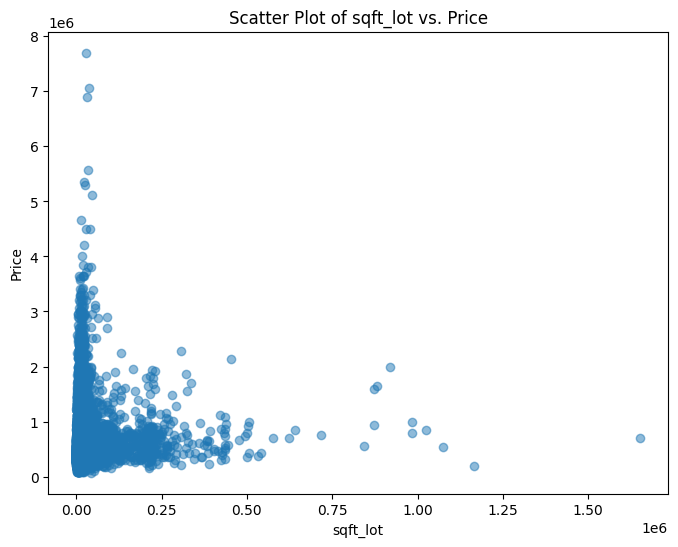

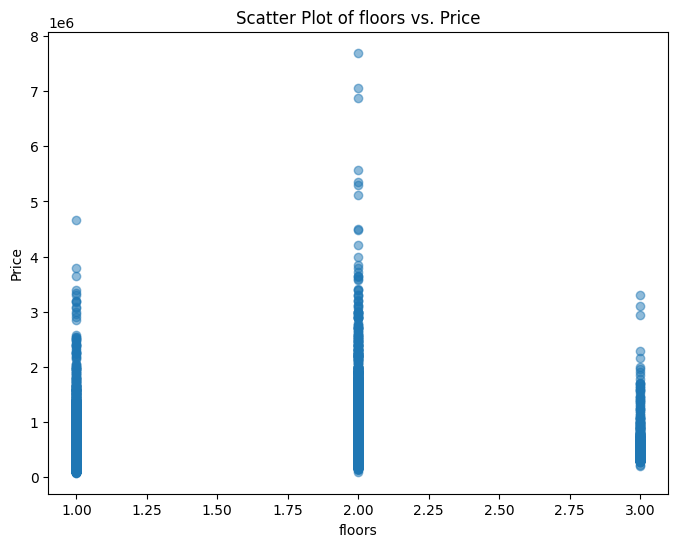

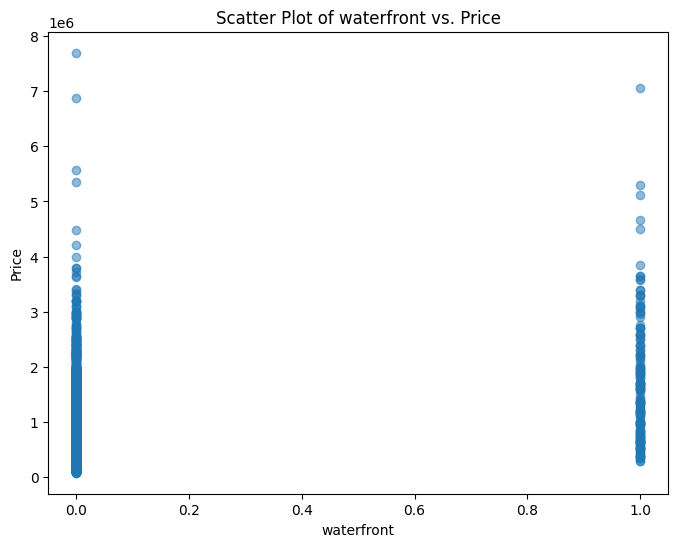

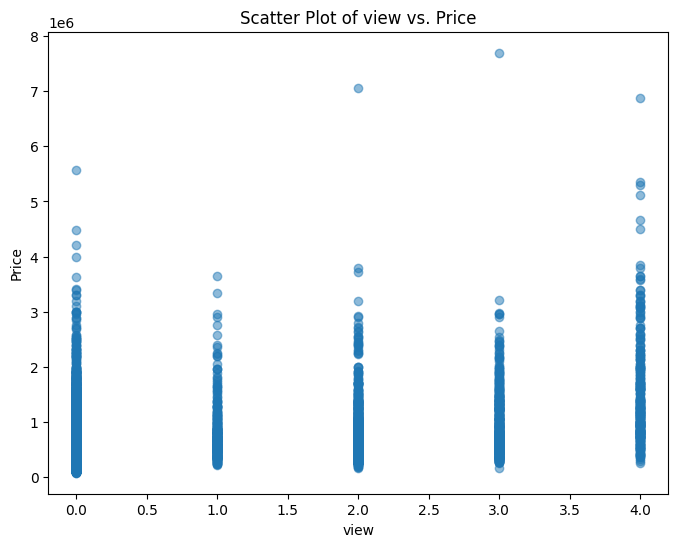

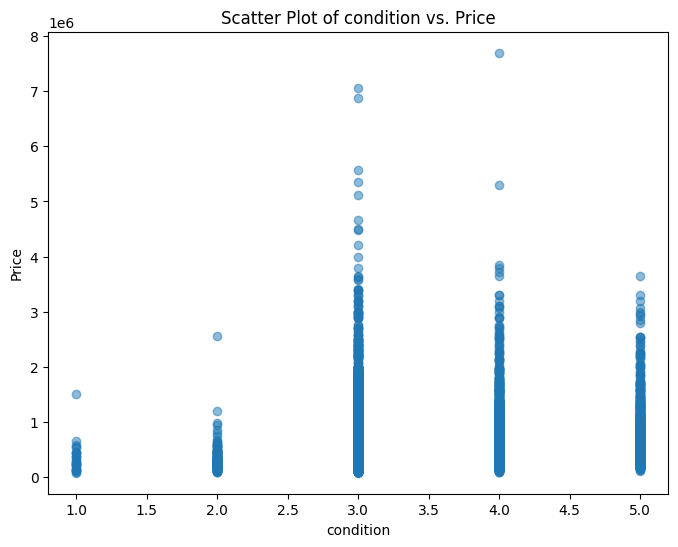

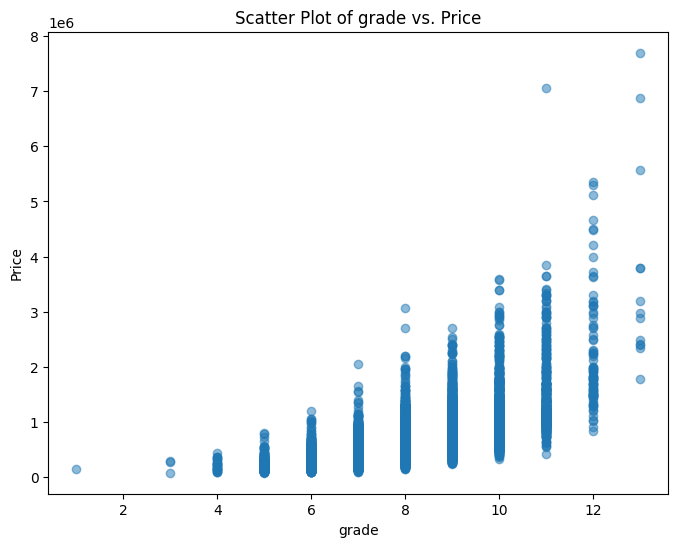

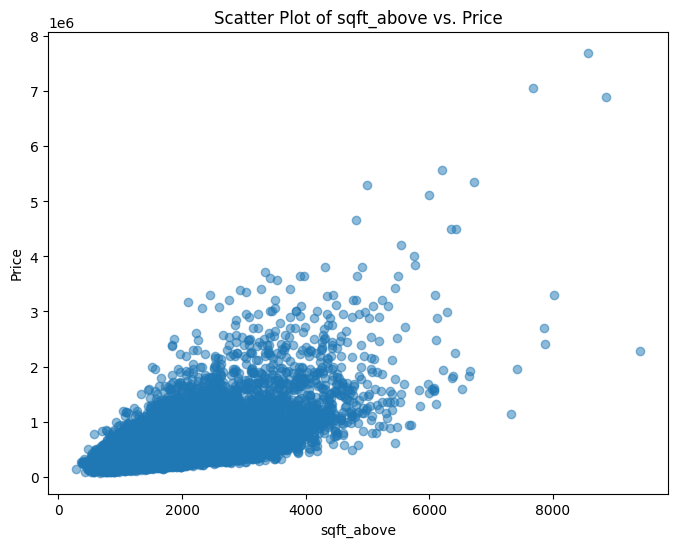

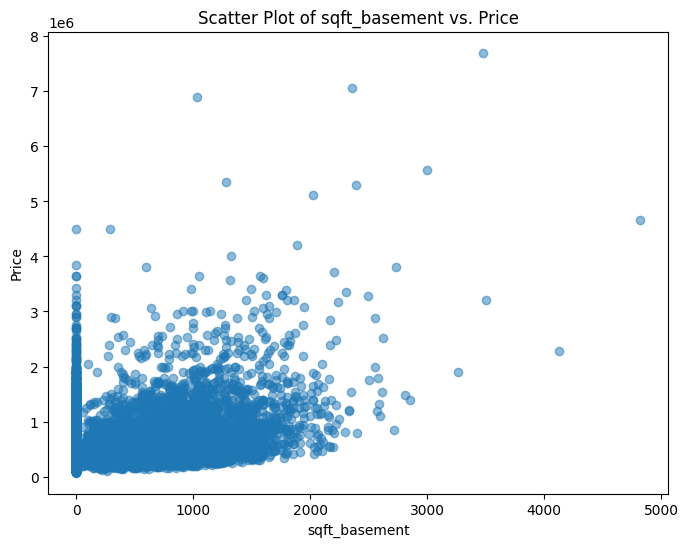

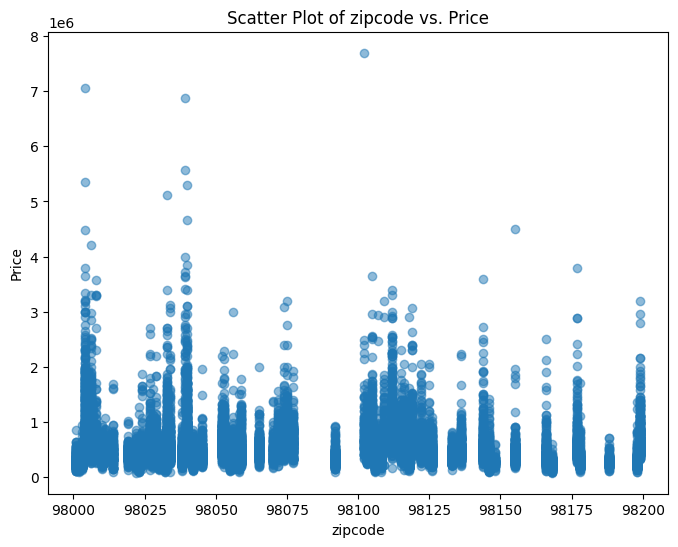

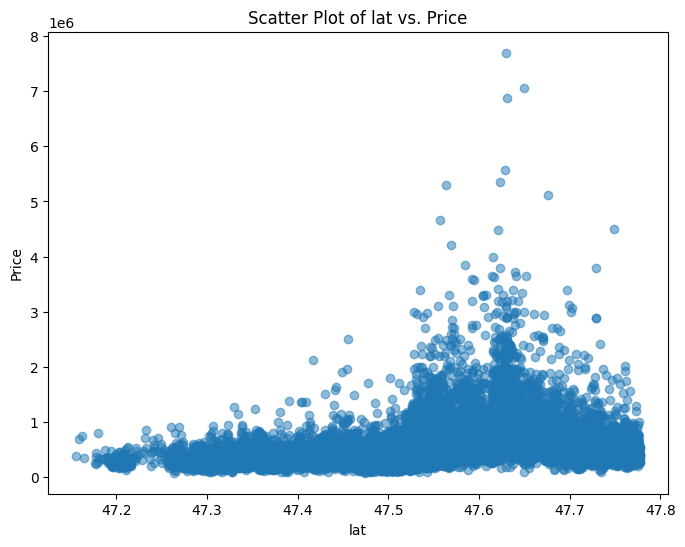

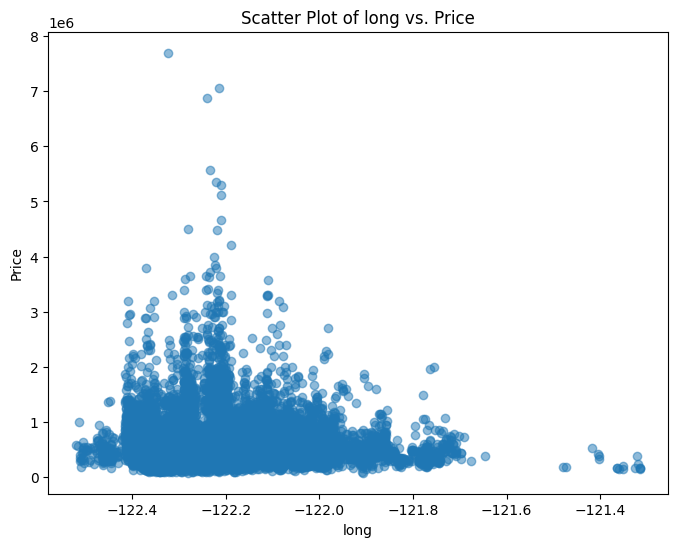

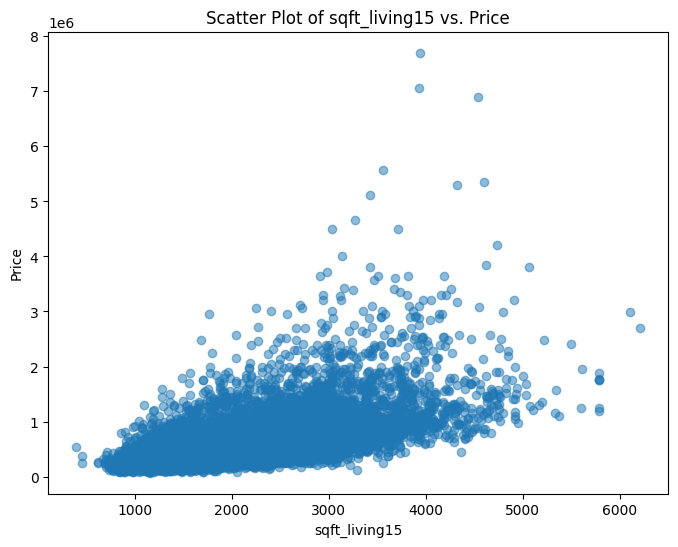

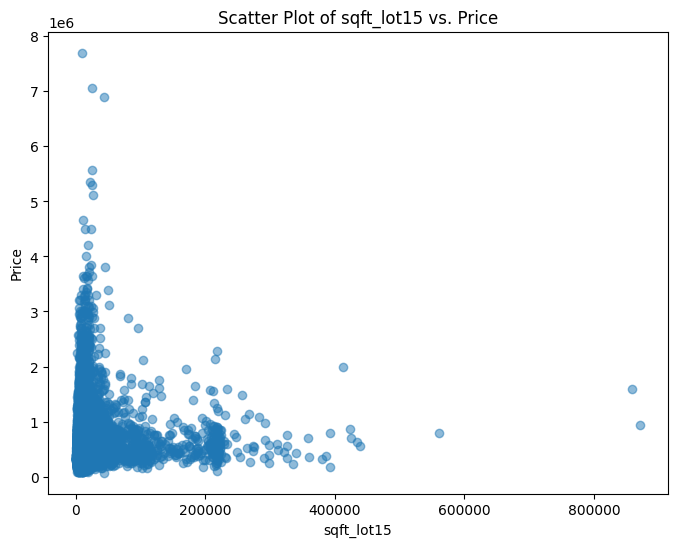

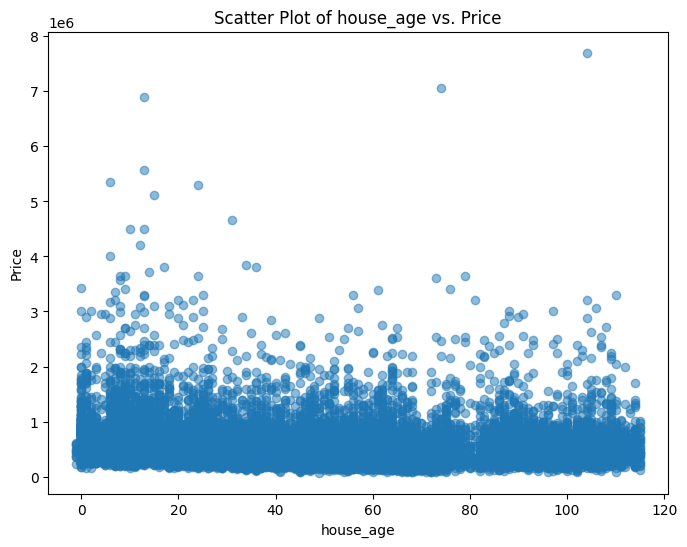

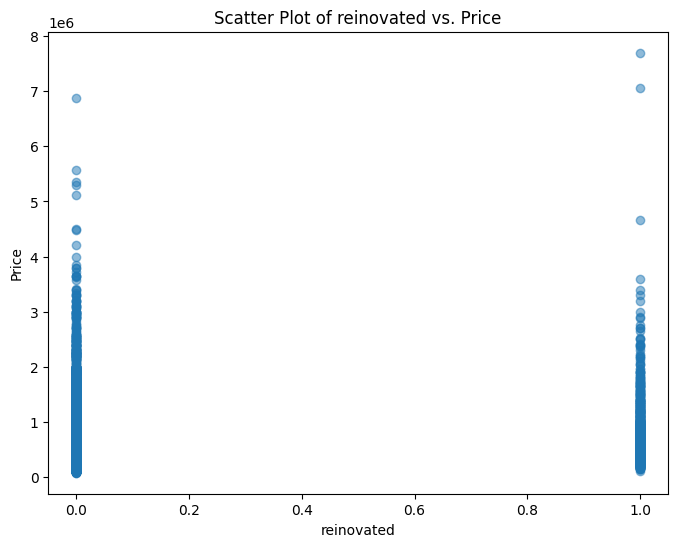

In [ ]:
for feature in features:
    plt.figure(figsize=(8, 6))
    plt.scatter(df[feature], df['price'], alpha=0.5)
    plt.title(f'Scatter Plot of {feature} vs. Price')
    plt.xlabel(feature)
    plt.ylabel('Price')
    plt.show()

Count Plot

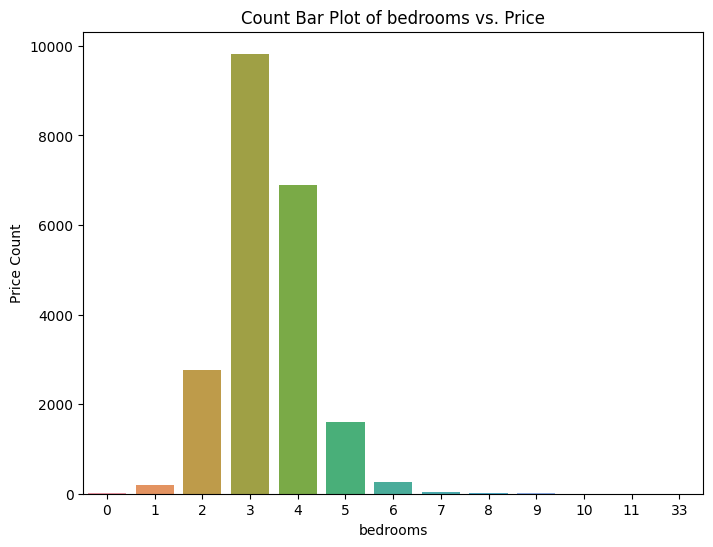

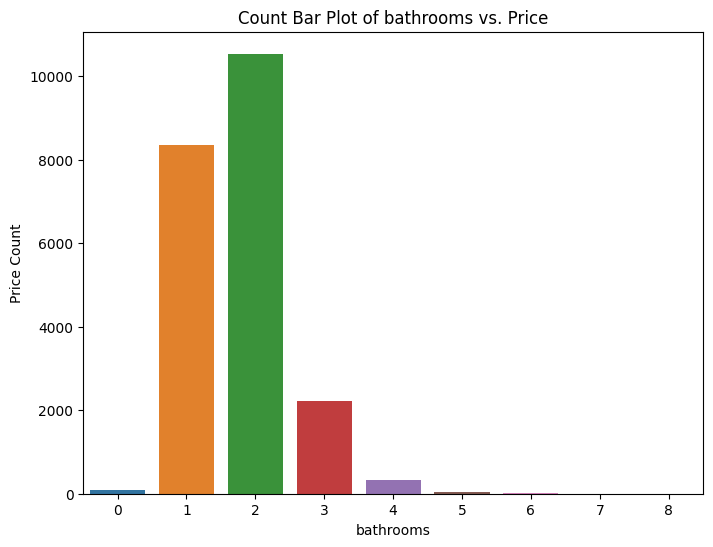

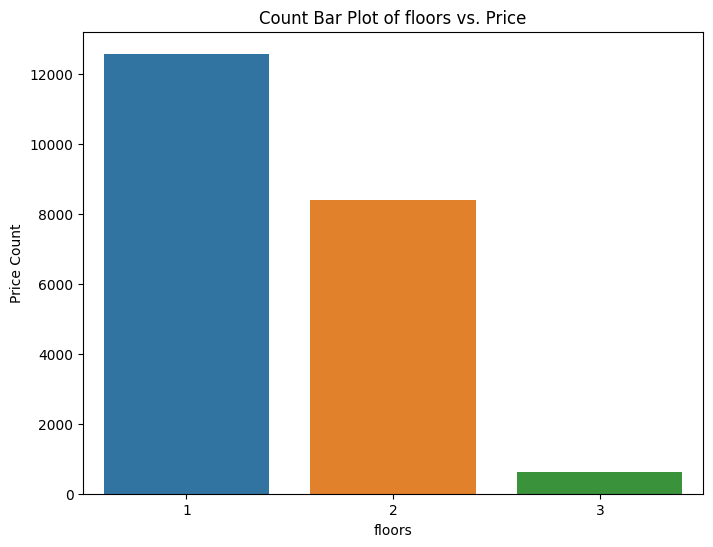

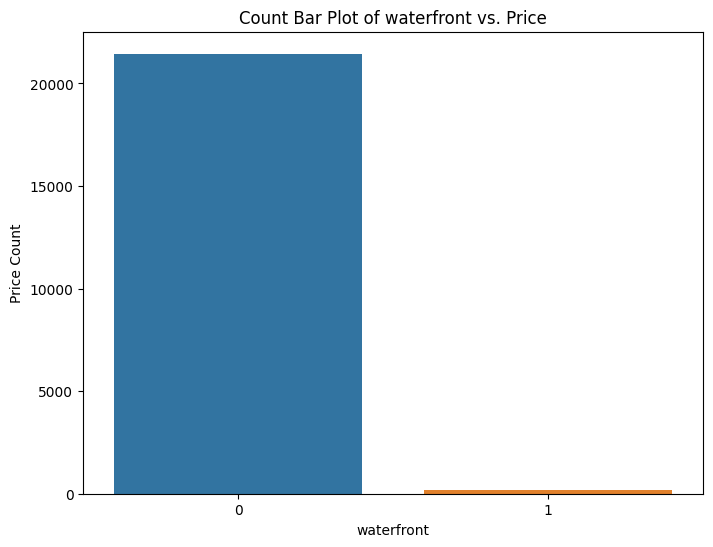

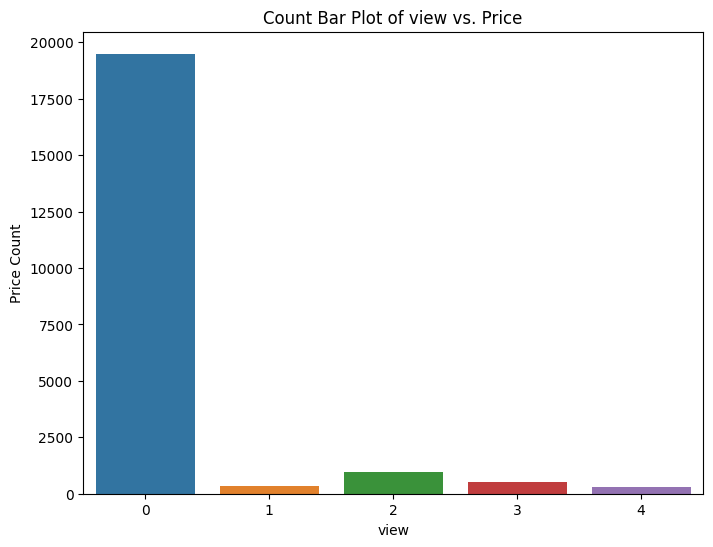

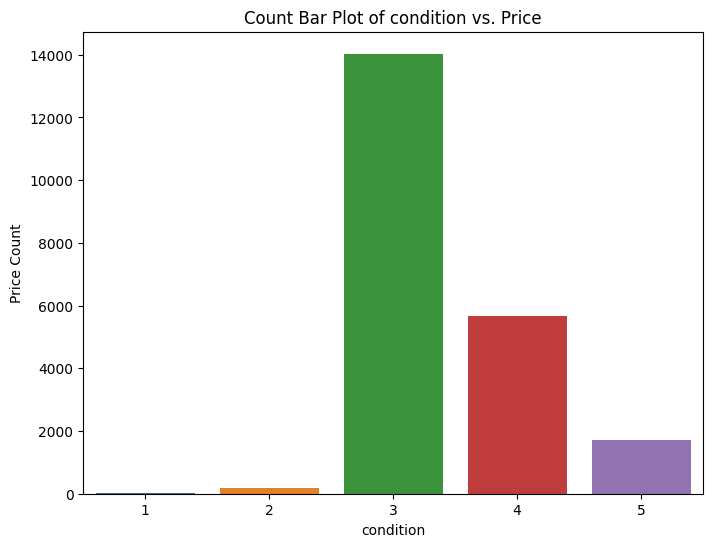

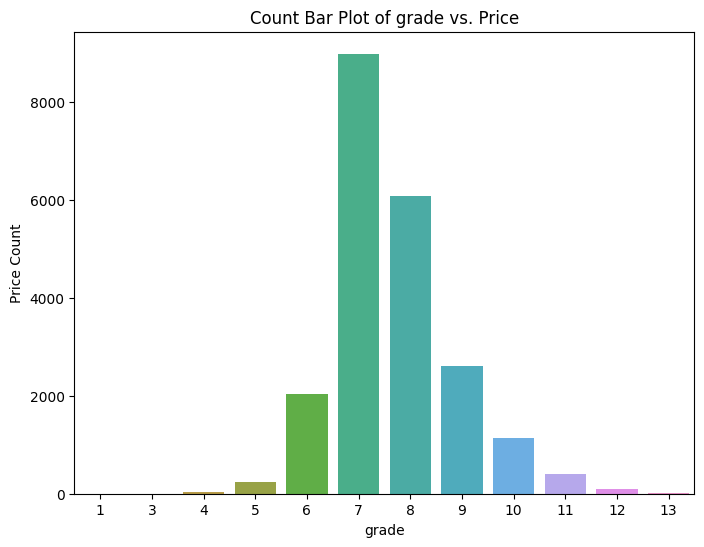

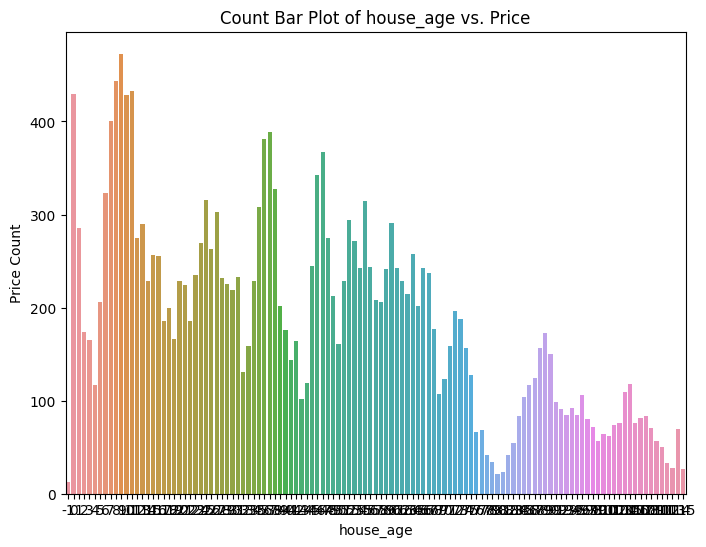

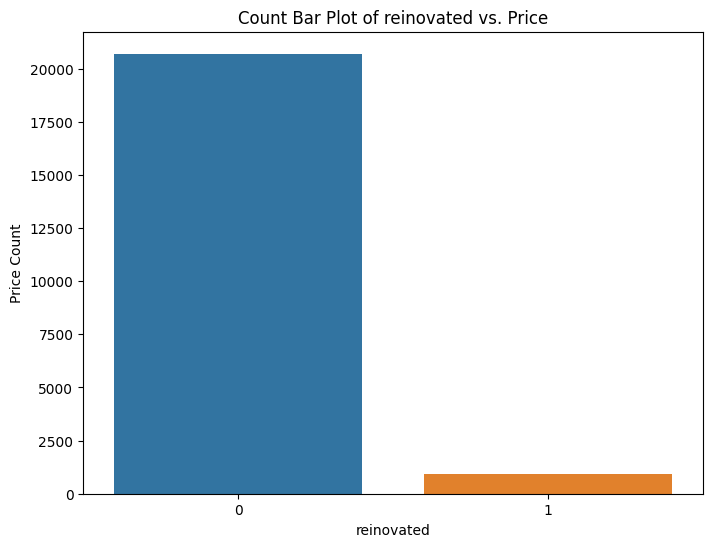

In [ ]:
exclude_columns = ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']
new_features = [feature for feature in features if feature not in exclude_columns]


for feature in new_features:
    plt.figure(figsize=(8, 6))
    sns.barplot(data=df, x=feature, y='price', estimator=len)
    plt.title(f'Count Bar Plot of {feature} vs. Price')
    plt.xlabel(feature)
    plt.ylabel('Price Count')
    plt.show()

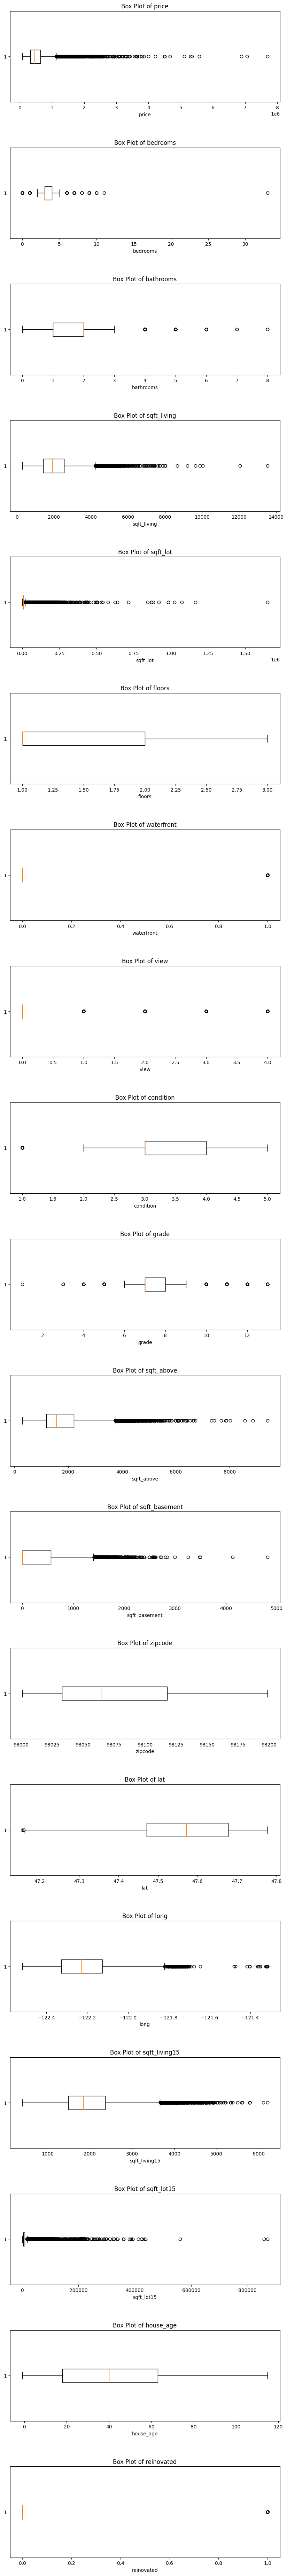

In [ ]:
numeric_columns = df.select_dtypes(include=['int', 'float']).columns

fig, axes = plt.subplots(nrows=len(numeric_columns), ncols=1, figsize=(10, 5 * len(numeric_columns)))
plt.subplots_adjust(hspace=0.5)


for i, column in enumerate(numeric_columns):
    ax = axes[i]
    ax.boxplot(df[column], vert=False)
    ax.set_title(f'Box Plot of {column}')
    ax.set_xlabel(column)

plt.show()

In [ ]:
df = df.sort_values(['price'], ascending=False).iloc[216:]

<ipython-input-20-423504c7ba78>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])


<Axes: xlabel='price', ylabel='Density'>

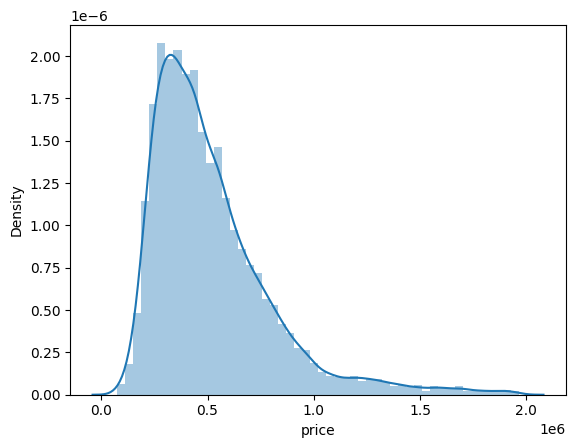

In [ ]:
palette = sns.color_palette("mako", as_cmap=True)
sns.distplot(df['price'])

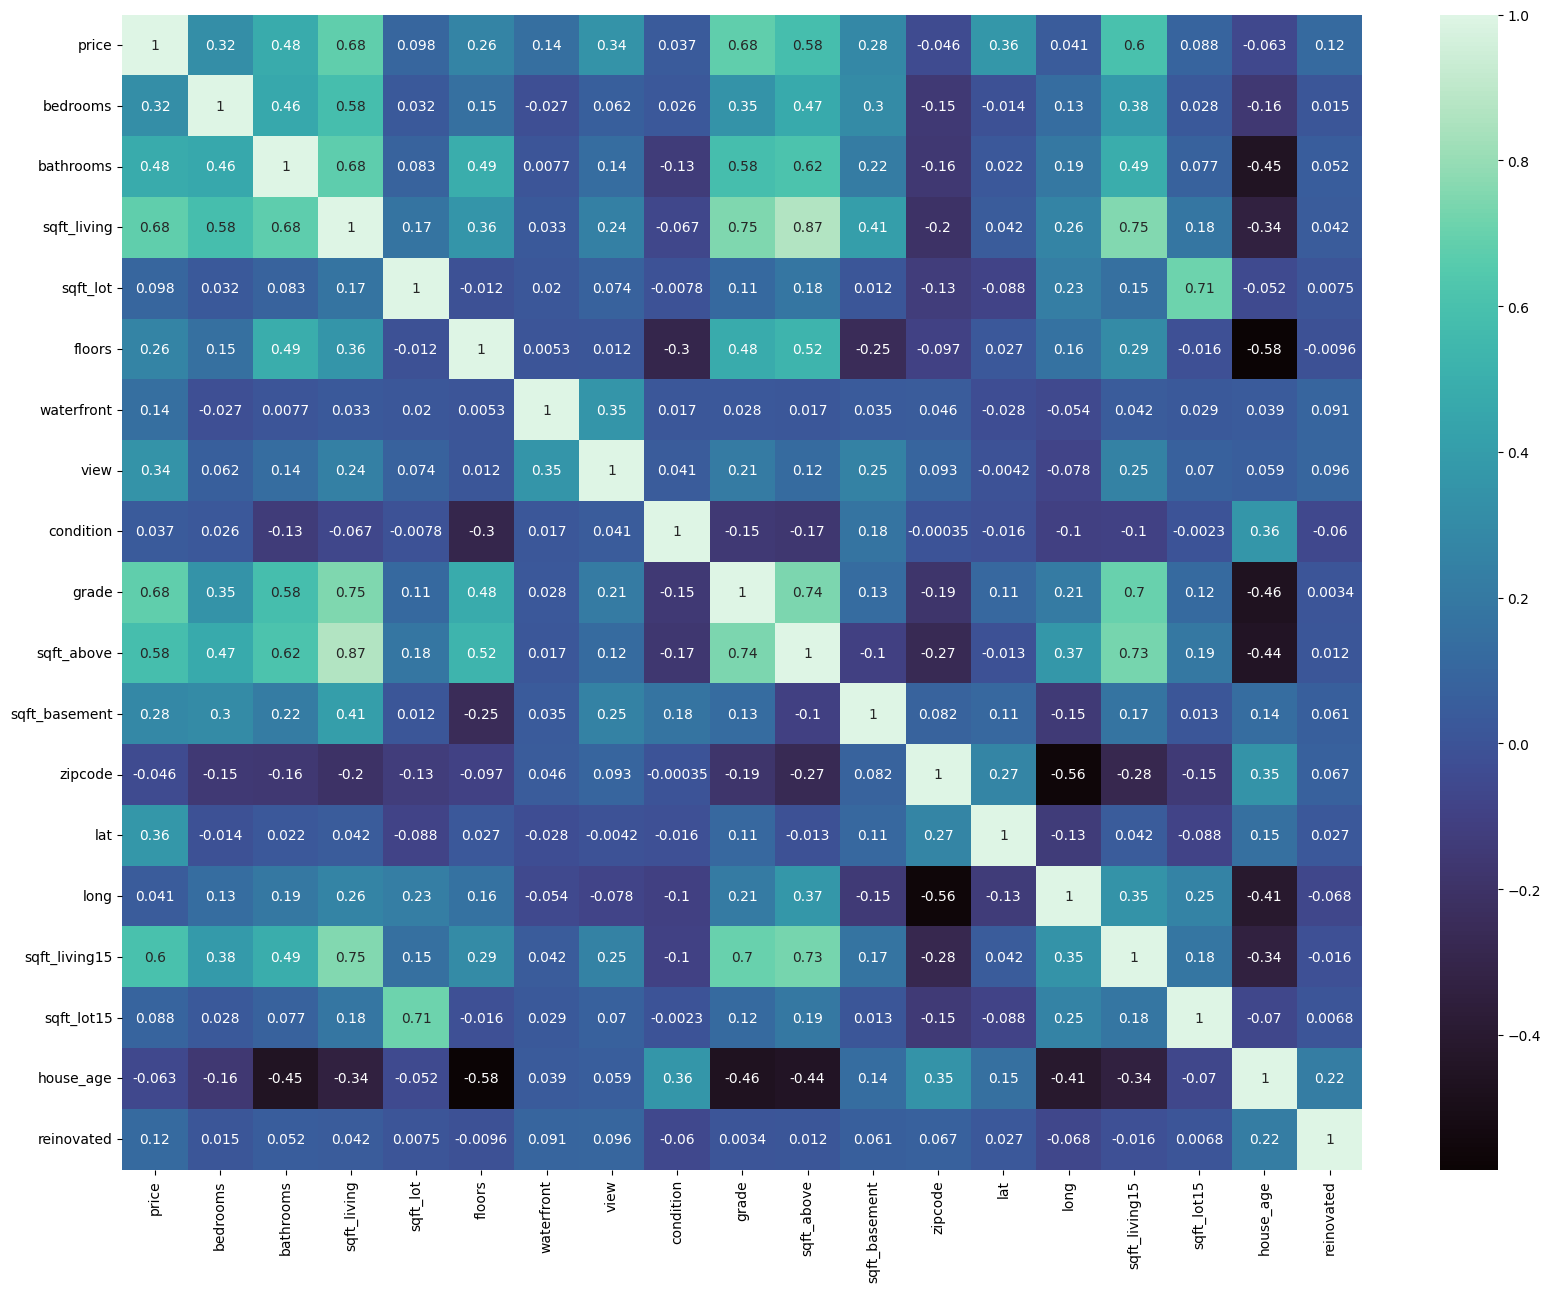

In [ ]:
cor = df.corr()
plt.figure(figsize=(20,15))
sns.heatmap(cor, annot=True, cmap=palette)
plt.show()

I've noticed that two variables, "price" and "sqft_living," have relatively large values, which could potentially impact the absolute numbers in the regression model. To address this issue, I intend to apply a data normalization technique by taking the logarithm of these variables.
Age and zipcode doesn't affect the price

In [ ]:
df['price'] = np.log(df['price'])
df['sqft_living'] = np.log(df['sqft_living'])

In [ ]:
df=df.drop(['house_age','zipcode'],axis=1)

**Machine Learning Models**

Data Splitting

In [ ]:
x = df.iloc[:, 1:]
y = df.iloc[:, 0:1]
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=0)

**Linear Regression**

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, Y_train)

Y_pred_lin = lin_reg.predict(X_test)
r2_lin = r2_score(Y_test, Y_pred_lin) * 100

print(f'Linear Regression R² Score     : {r2_lin}')

Linear Regression R² Score     : 73.73078536664843


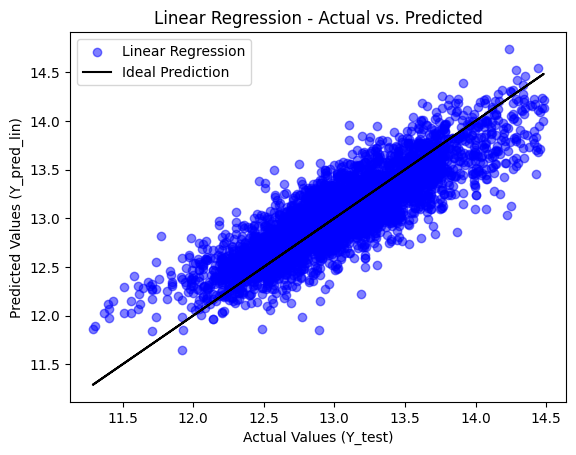

In [ ]:
plt.scatter(Y_test, Y_pred_lin, c='blue', alpha=0.5, label='Linear Regression')
plt.plot(Y_test, Y_test, color="black", label='Ideal Prediction')
plt.xlabel("Actual Values (Y_test)")
plt.ylabel("Predicted Values (Y_pred_lin)")
plt.title("Linear Regression - Actual vs. Predicted")
plt.legend(loc='best')
plt.show()

**Decision Tree**

In [ ]:
decision_tree_reg = DecisionTreeRegressor(random_state=0)
decision_tree_reg.fit(X_train, Y_train)

Y_pred_tree = decision_tree_reg.predict(X_test)

r2_tree = r2_score(Y_test, Y_pred_tree)*100

print(f'Decision Tree R² Score: {r2_tree}')

Decision Tree R² Score: 76.36613470356696


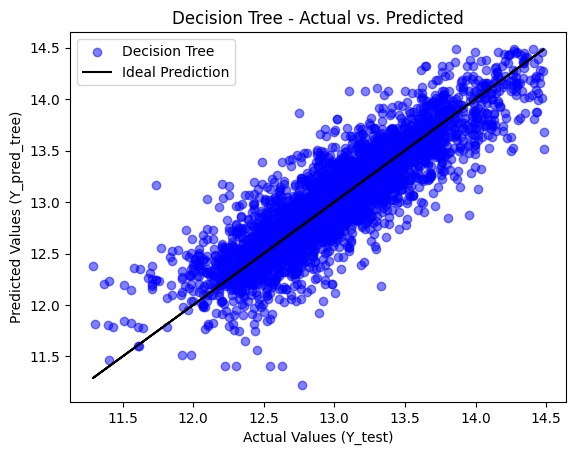

In [ ]:
plt.scatter(Y_test, Y_pred_tree, c='blue', alpha=0.5, label='Decision Tree')
plt.plot(Y_test, Y_test, color="black", label='Ideal Prediction')
plt.xlabel("Actual Values (Y_test)")
plt.ylabel("Predicted Values (Y_pred_tree)")
plt.title("Decision Tree - Actual vs. Predicted")
plt.legend(loc='best')
plt.show()

**Random Forest**

In [ ]:
rf_reg = RandomForestRegressor(n_estimators=10, random_state=0)
rf_reg.fit(X_train, Y_train.values)

Y_pred_rf = rf_reg.predict(X_test)
r2_rf = r2_score(Y_test, Y_pred_rf) * 100
print(f'Random Forest R² Score         : {r2_rf}')

<ipython-input-29-f3564ceb0804>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_reg.fit(X_train, Y_train.values)


Random Forest R² Score         : 86.44354397441099


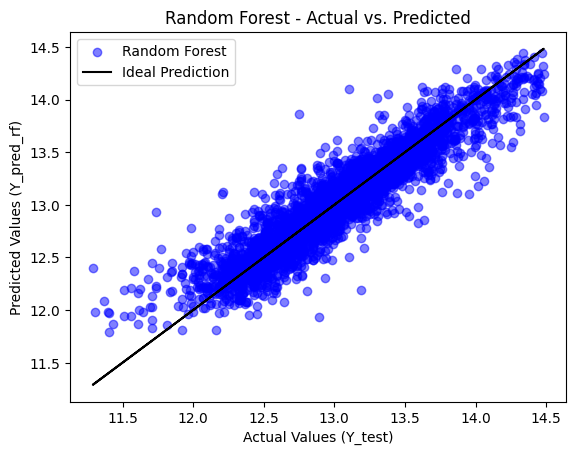

In [ ]:
plt.scatter(Y_test, Y_pred_rf, c='blue', alpha=0.5, label='Random Forest')
plt.plot(Y_test, Y_test, color="black", label='Ideal Prediction')
plt.xlabel("Actual Values (Y_test)")
plt.ylabel("Predicted Values (Y_pred_rf)")
plt.title("Random Forest - Actual vs. Predicted")
plt.legend(loc='best')
plt.show()

**Conclusion**

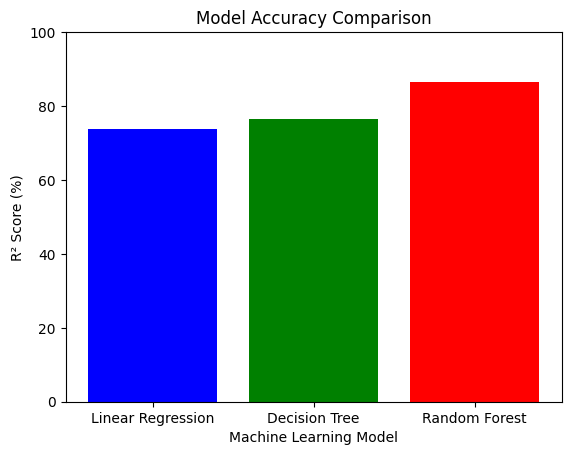

In [ ]:
models = ['Linear Regression', 'Decision Tree', 'Random Forest']
accuracies = [r2_lin, r2_tree, r2_rf]

plt.bar(models, accuracies, color=['blue', 'green', 'red'])
plt.xlabel('Machine Learning Model')
plt.ylabel('R² Score (%)')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 100)
plt.show()

In [ ]:
print("Scores Of Models")
print(f'Linear Regression R² Score     : {r2_lin:.2f}%')
print(f'Decision Tree R² Score         : {r2_tree:.2f}%')
print(f'Random Forest R² Score         : {r2_rf:.2f}%')

Scores Of Models
Linear Regression R² Score     : 73.73%
Decision Tree R² Score         : 76.37%
Random Forest R² Score         : 86.44%


# **The Random Forest model stands out as the top-performing model, achieving an impressive accuracy of approximately 86.4%.**